In [ ]:
# For colab.
# !pip install ffmpeg
# from matplotlib.animation import FuncAnimation, FFMpegWriter

In [1]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation

tau = 2 * np.pi

In [2]:
import sys
# Append parent dir to path, so that other modules can be imported.
sys.path.append('../')

In [3]:
from modules.visualize import plot_complex, double_plot
from fourier_core import compute_coeffs, fourier_series, compute_fourier_approximation

### Some functions with real domain, $f(x) \in \mathbb{R}$

  0%|          | 0/20 [00:00<?, ?it/s]

1001


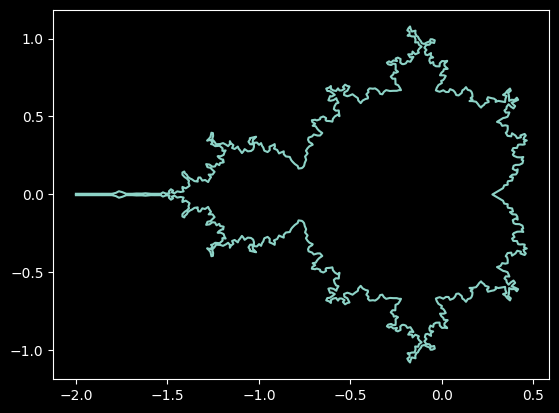

In [4]:
from modules import pathological_functions_2d


points = pathological_functions_2d.mandelbrot(size=1001, iters=20, num_points=1001)
print(len(points))
plot_complex(points)

### Approximation animation

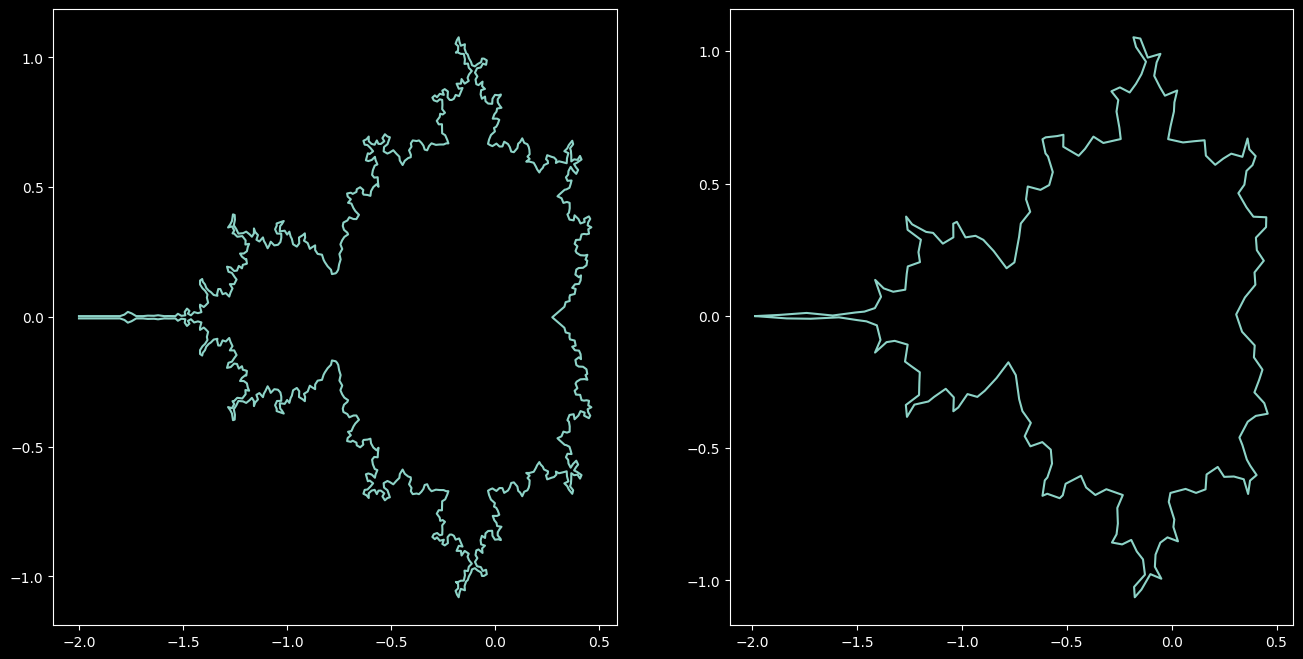

In [5]:
points_appr = compute_fourier_approximation(points, num_coeffs=201)
double_plot(points, points_appr)

#### Evolution (Coeff progression)

In [6]:
from modules.fourier_utils import compute_apprs
from modules.visualize import evolution_animate

In [7]:
num_coeffs = 501
coeffs = compute_coeffs(points, num_coeffs)

points_apprs = compute_apprs(coeffs, len(points))

calculating approximations:   0%|          | 0/501 [00:00<?, ?it/s]

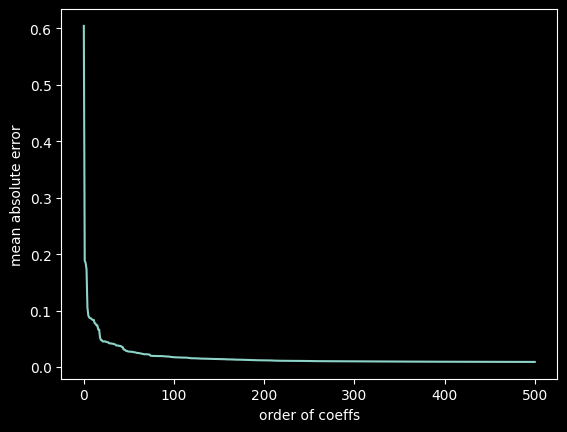

In [8]:
errs = np.log(1+abs(points - points_apprs).mean(1))
plt.plot(errs)
plt.xlabel('order of coeffs')
plt.ylabel('mean absolute error')
plt.show()

In [9]:
"""All coeffs, sum upto [C0,C1,C-1,C2,C-2,...]
Basically [C0, C0+C1, C0+C1+C-1, C0+C1+C-1+C2, C0+C1+C-1+C2+C-2]"""
# points_apprs = dict(zip(range(1,1+len(points_apprs)), points_apprs))

"""At every even index we have sum of c_n and c_-n, sum upto [C0,C-1,C-2,...]
Basically [C0, C0+C1+C-1, C0+C1+C-1+C2+C-2]"""
points_apprs = {1+i*2: point_appr for i, point_appr in enumerate(points_apprs[::2])}

anim = evolution_animate(points_apprs)
FFwriter = animation.FFMpegWriter(fps=10)
anim.save('../animations/evolution.gif', writer=animation.PillowWriter(fps=10))

# For colab.
# anim.save(f'../animations/evolution.mp4', writer=FFwriter, dpi=300)

generating evolution animation:   0%|          | 0/251 [00:00<?, ?it/s]

#### Epicycles (Time progression)

In [20]:
from modules.visualize import epicycles_animate

In [10]:
from modules.fourier_utils import compute_circle_centers


num_coeffs = 301
coeffs = compute_coeffs(points, num_coeffs)
n_samples = len(points)  # number of time points to sample

centers_time = compute_circle_centers(coeffs, n_samples, sort=True)

calculating centers and radii:   0%|          | 0/1001 [00:00<?, ?it/s]

In [26]:
anim = epicycles_animate(centers_time, detail=17)

FFwriter = animation.FFMpegWriter(fps=10)
anim.save(f'../animations/epicycles_{num_coeffs}.mp4', writer=FFwriter, dpi=300)

generating epicycles animation:   0%|          | 0/1000 [00:00<?, ?it/s]